In [1]:
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from joblib import load
from matplotlib import transforms
import numpy as np

from feature_effect_empirical_analysis.data_generation import generate_data, Groundtruth
from feature_effect_empirical_analysis.plotting.utils import set_style

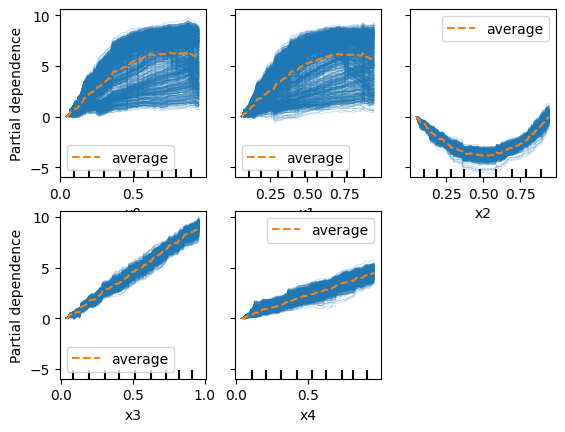

In [2]:
loaded_model = load('../models/XGBRegressor_20240407_1_1000_0.1.joblib')
X_train, y_train, X_test, y_test = generate_data(1000, 1000, 0.1, 0)
display = PartialDependenceDisplay.from_estimator(loaded_model, X_train, features=['x0', 'x1', 'x2', 'x3', 'x4',], kind='both', centered=True)

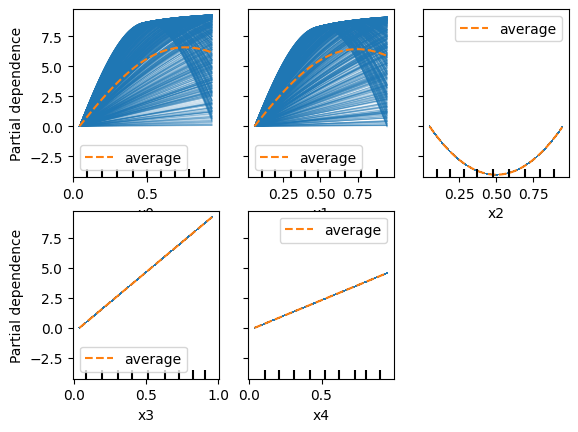

In [3]:
groundtruth = Groundtruth()
groundtruth.fit(X_train, y_train)
display = PartialDependenceDisplay.from_estimator(groundtruth, X_train, features=['x0', 'x1', 'x2', 'x3', 'x4',], kind='both', centered=True)

In [4]:
pd0 = partial_dependence(loaded_model, X_train, features=[0], kind='average', percentiles=(0, 1), grid_resolution=100)
pd0

c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\sklearn\utils\_bunch.py:35: FutureWarning: Key: 'values', is deprecated in 1.3 and will be removed in 1.5. Please use 'grid_values' instead.
  warnings.warn(


{'grid_values': [array([0.0016845 , 0.01174823, 0.02181196, 0.0318757 , 0.04193943,
         0.05200316, 0.06206689, 0.07213062, 0.08219436, 0.09225809,
         0.10232182, 0.11238555, 0.12244929, 0.13251302, 0.14257675,
         0.15264048, 0.16270422, 0.17276795, 0.18283168, 0.19289541,
         0.20295915, 0.21302288, 0.22308661, 0.23315034, 0.24321407,
         0.25327781, 0.26334154, 0.27340527, 0.283469  , 0.29353274,
         0.30359647, 0.3136602 , 0.32372393, 0.33378767, 0.3438514 ,
         0.35391513, 0.36397886, 0.3740426 , 0.38410633, 0.39417006,
         0.40423379, 0.41429752, 0.42436126, 0.43442499, 0.44448872,
         0.45455245, 0.46461619, 0.47467992, 0.48474365, 0.49480738,
         0.50487112, 0.51493485, 0.52499858, 0.53506231, 0.54512605,
         0.55518978, 0.56525351, 0.57531724, 0.58538097, 0.59544471,
         0.60550844, 0.61557217, 0.6256359 , 0.63569964, 0.64576337,
         0.6558271 , 0.66589083, 0.67595457, 0.6860183 , 0.69608203,
         0.70614576

In [5]:
pd0_gt = partial_dependence(groundtruth, X_train, features=[0], kind='average', percentiles=(0, 1), grid_resolution=100)
pd0_gt

{'grid_values': [array([0.0016845 , 0.01174823, 0.02181196, 0.0318757 , 0.04193943,
         0.05200316, 0.06206689, 0.07213062, 0.08219436, 0.09225809,
         0.10232182, 0.11238555, 0.12244929, 0.13251302, 0.14257675,
         0.15264048, 0.16270422, 0.17276795, 0.18283168, 0.19289541,
         0.20295915, 0.21302288, 0.22308661, 0.23315034, 0.24321407,
         0.25327781, 0.26334154, 0.27340527, 0.283469  , 0.29353274,
         0.30359647, 0.3136602 , 0.32372393, 0.33378767, 0.3438514 ,
         0.35391513, 0.36397886, 0.3740426 , 0.38410633, 0.39417006,
         0.40423379, 0.41429752, 0.42436126, 0.43442499, 0.44448872,
         0.45455245, 0.46461619, 0.47467992, 0.48474365, 0.49480738,
         0.50487112, 0.51493485, 0.52499858, 0.53506231, 0.54512605,
         0.55518978, 0.56525351, 0.57531724, 0.58538097, 0.59544471,
         0.60550844, 0.61557217, 0.6256359 , 0.63569964, 0.64576337,
         0.6558271 , 0.66589083, 0.67595457, 0.6860183 , 0.69608203,
         0.70614576

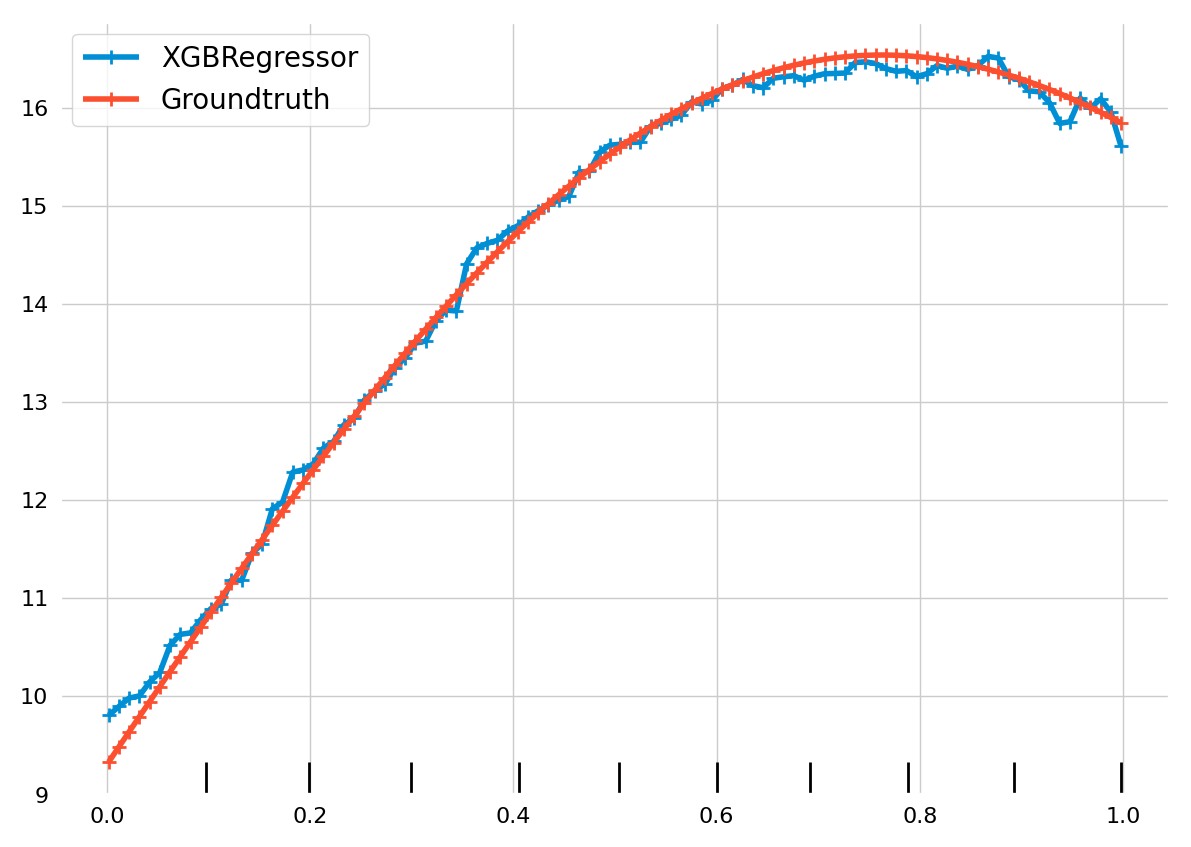

In [6]:
# plot comparison of pd0 and pd0_gt
set_style()
plt.figure(dpi=200)
plt.plot(pd0['grid_values'][0], pd0['average'][0], label='XGBRegressor', linewidth=2, marker='+', markeredgewidth=1, markersize=5)
plt.plot(pd0_gt['grid_values'][0], pd0_gt['average'][0], label='Groundtruth', linewidth=2, marker='+', markeredgewidth=1, markersize=5)
deciles = np.percentile(X_train[:,0], np.arange(10, 101, 10))
trans = transforms.blended_transform_factory(plt.gca().transData, plt.gca().transAxes)
plt.gca().vlines(deciles, 0, 0.045, transform=trans, color='k', linewidth=1)
plt.legend()
plt.show()

In [7]:
mean_squared_error(pd0['average'][0], pd0_gt['average'][0])

0.018625239322709847

In [8]:
loaded_rf = load('../models/RandomForestRegressor_20240407_1_1000_0.1.joblib')
pd_rf = partial_dependence(loaded_rf, X_train, features=[0], kind='average', percentiles=(0, 1), grid_resolution=100)

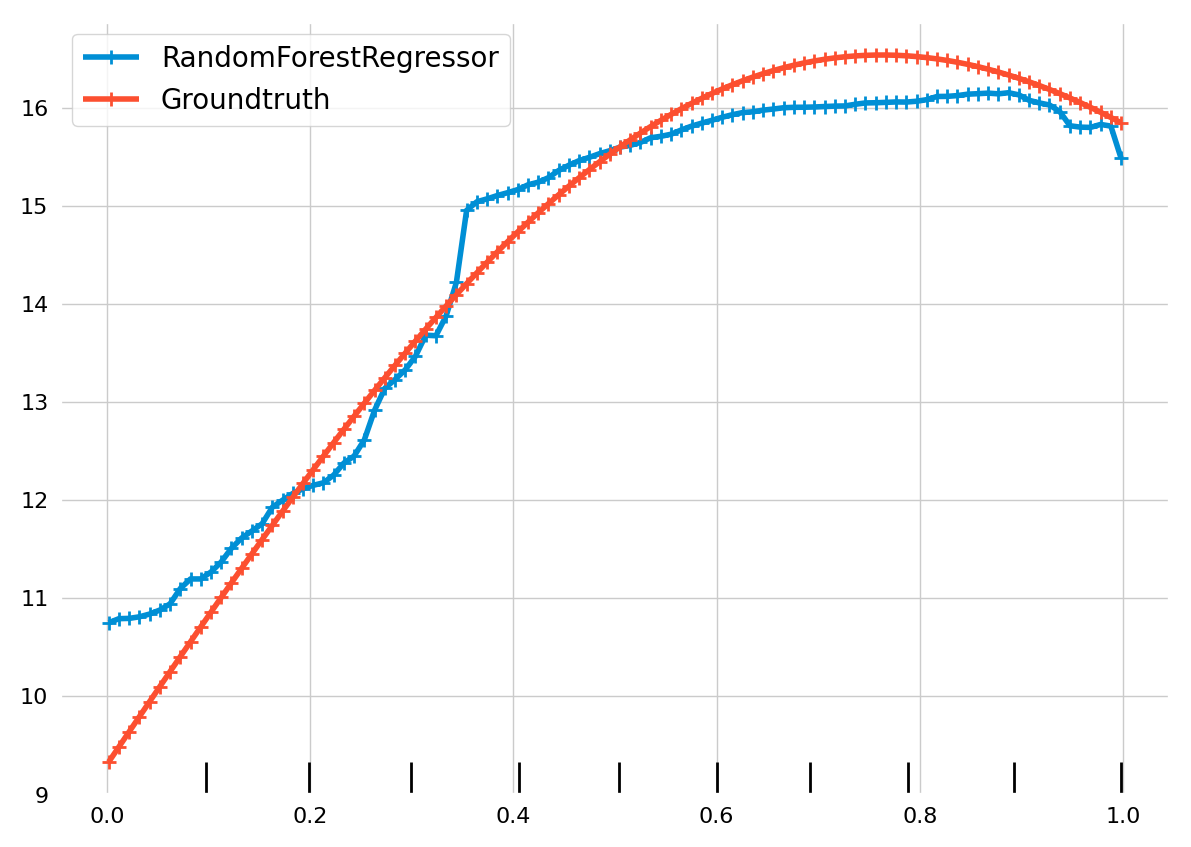

In [9]:
# plot comparison of pd0 and pd0_gt
set_style()
plt.figure(dpi=200)
plt.plot(pd_rf['grid_values'][0], pd_rf['average'][0], label='RandomForestRegressor', linewidth=2, marker='+', markeredgewidth=1, markersize=5)
plt.plot(pd0_gt['grid_values'][0], pd0_gt['average'][0], label='Groundtruth', linewidth=2, marker='+', markeredgewidth=1, markersize=5)
deciles = np.percentile(X_train[:,0], np.arange(10, 101, 10))
trans = transforms.blended_transform_factory(plt.gca().transData, plt.gca().transAxes)
plt.gca().vlines(deciles, 0, 0.045, transform=trans, color='k', linewidth=1)
plt.legend()
plt.show()

In [10]:
from feature_effect_empirical_analysis.plotting.plots import plot_pdp_comparison

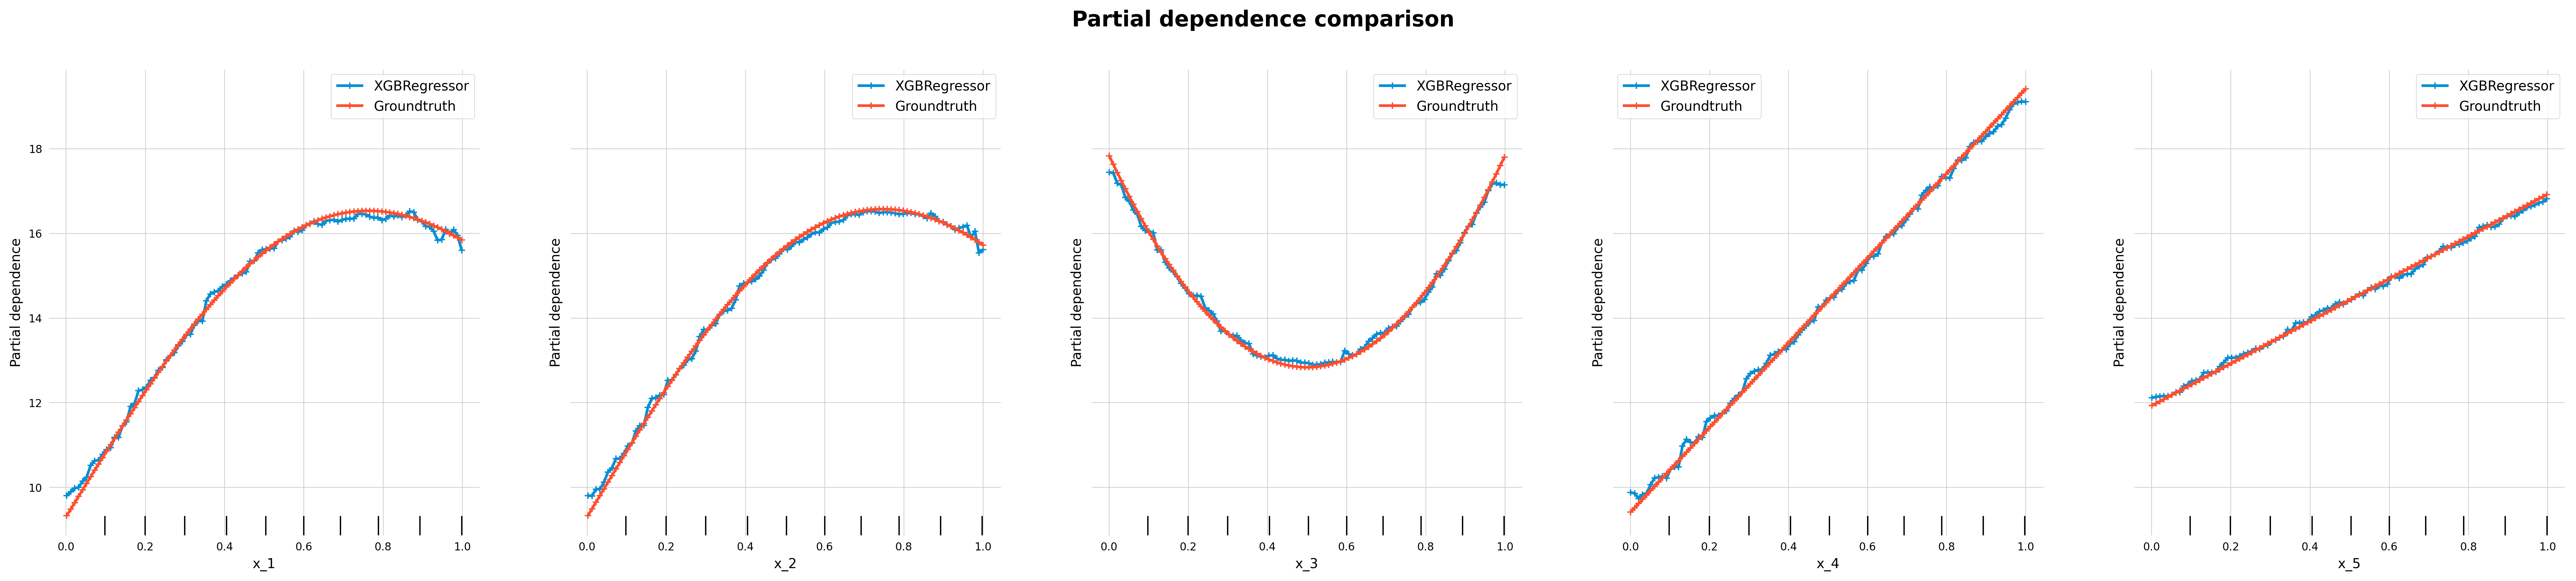

In [11]:
plot_pdp_comparison(loaded_model, groundtruth, X_train, features=['x_1', "x_2", "x_3", "x_4", "x_5"]);

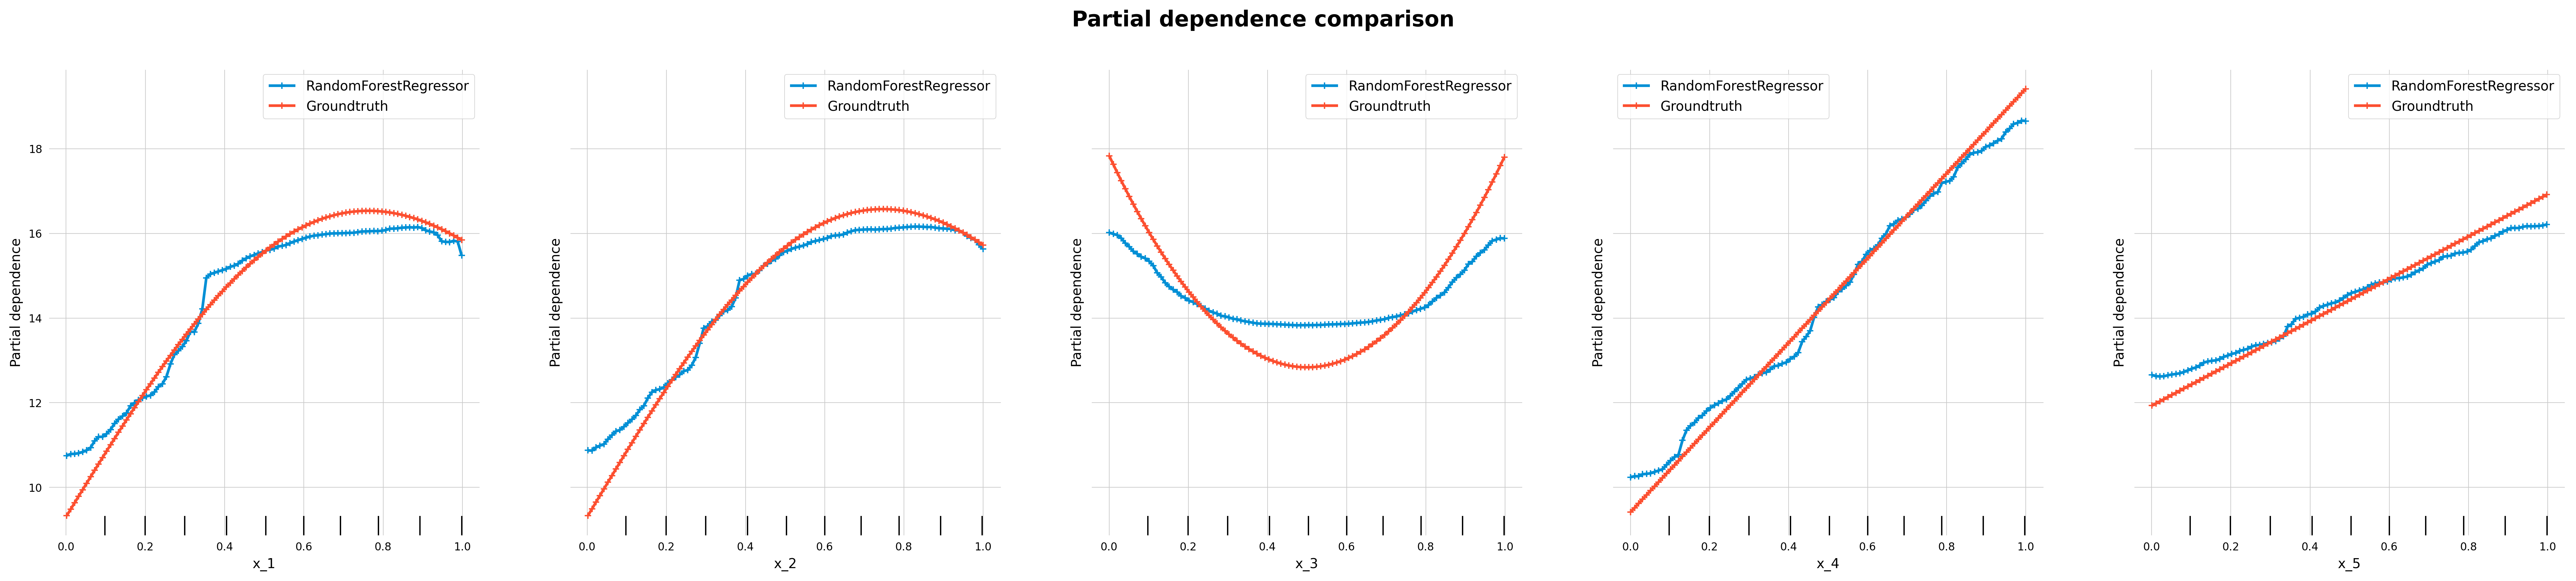

In [12]:
plot_pdp_comparison(loaded_rf, groundtruth, X_train, features=['x_1', "x_2", "x_3", "x_4", "x_5"]);

In [13]:
from feature_effect_empirical_analysis.mappings import GAM
from feature_effect_empirical_analysis.data_generation import generate_data, Groundtruth
from feature_effect_empirical_analysis.plotting.plots import plot_pdp_comparison

gam = GAM(s_features=[2, 3, 4], te_features=[(0, 1)])
X_train, y_train, X_test, y_test = generate_data(1000, 1000, 0.1, 0)
groundtruth = Groundtruth()

c:\Users\ti-he\OneDrive\Dokumente\Projekte\feature-effect-empirical-analysis\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


TypeError: GAM.__init__() got an unexpected keyword argument 'terms'

In [ ]:
gam.fit(X_train, y_train)

GAM(terms=s(2) + s(3) + s(4) + te(0, 1))

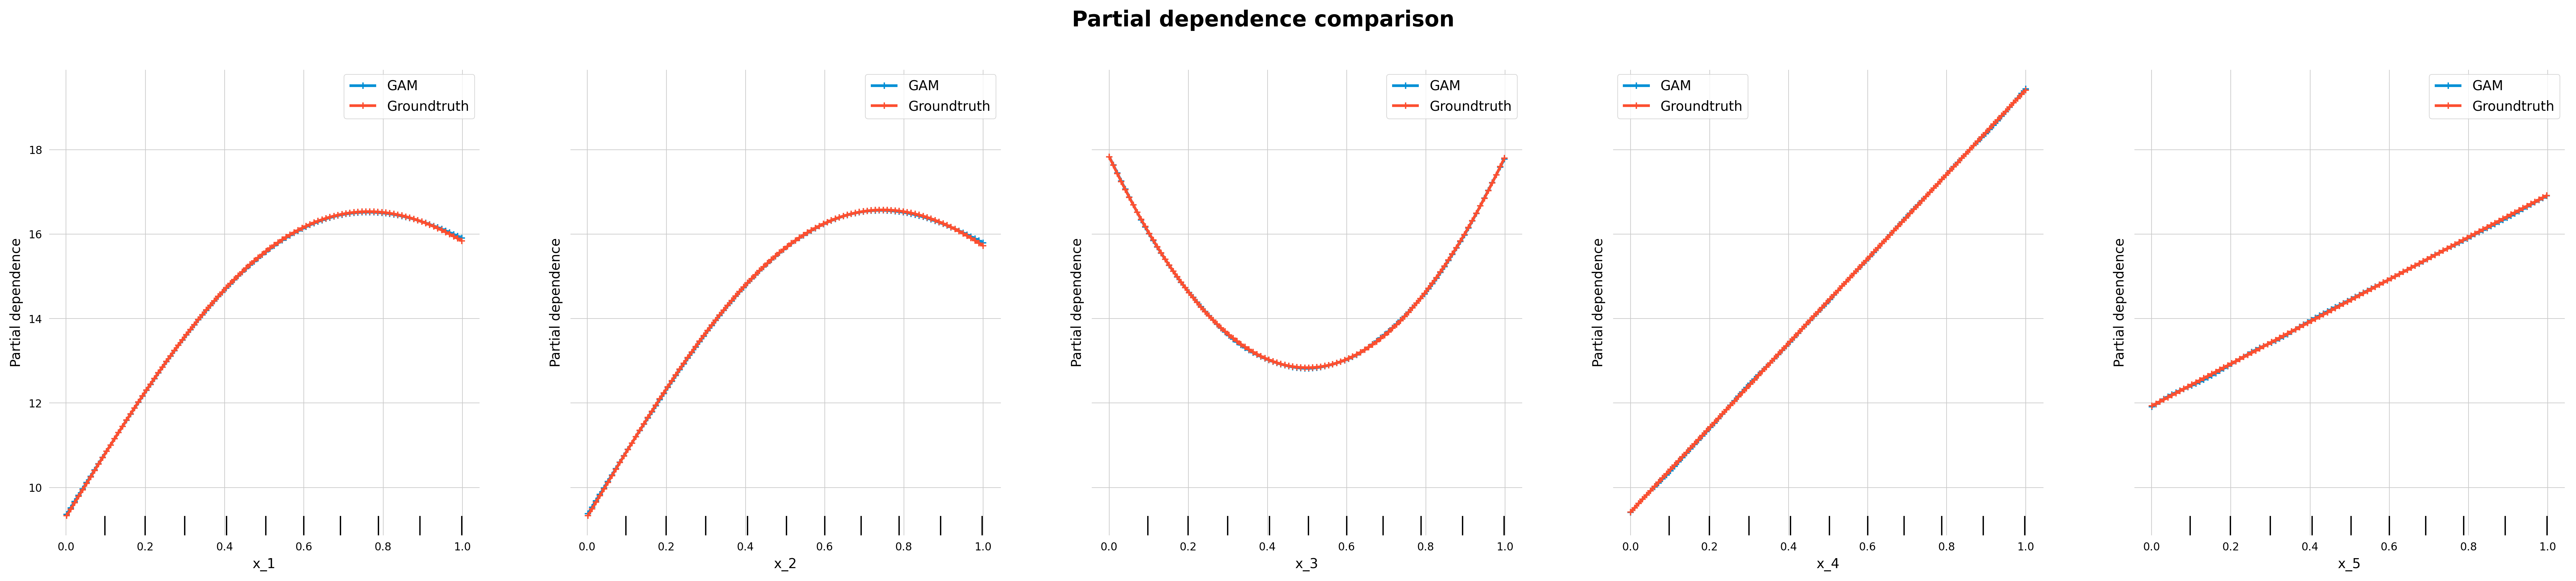

In [ ]:
plot_pdp_comparison(gam, groundtruth, X_train, features=['x_1', "x_2", "x_3", "x_4", "x_5"]);